# CMSC 478-ML Homework 1
## By: Pravar Kochar

In [1]:
import timeit
import matplotlib.pyplot as plot
# Include the self made Data class.
from HW1_functions import Data
from IPython.display import display, Latex

# Initialize in the data from the .csv file.
car = Data()

---
__Question 1a__. Print the first 5 values of scaled weight. Calculate the mean and variance of
scaled weight

---

In [2]:
car.calc_scaled_weight()
car.print_scaled_weights_and_mean_var()

First 5 scaled weights:
	 -0.62017
	 -0.35538
	 -0.93168
	 -0.00234
	 0.23130
Scaled weight mean:  -0.00000 
Scaled weight variance:  1.00000


---
__Question 1b.__ Make a scatter plot of *mpg* (on y-axis) and *scaled_weight* (on x-axis). What is
your interpretation of the plot?

---

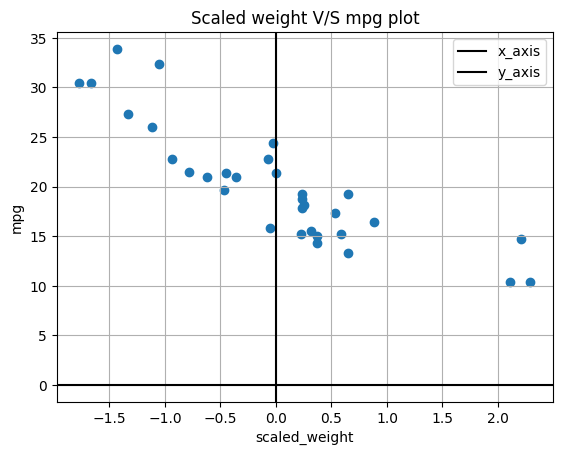

In [3]:
car.plot_scatter_plot(car.cars_data[car.scaled_w], car.cars_data[car.mpg], 'Scaled weight V/S mpg plot', car.scaled_w, car.mpg)

Interpretation: The plot seems to be have a decreasing linear trend and the scaled weight has
shifted the weights to be centered around the y-axis.

---
__Question 1c.__ Learn a simple linear hypothesis to predict mpg based on scaled weight using the gradient descent
algorithm.

---

Simple linear hypothesis to predict:
$\begin{equation} h_\Theta (x) := \hat{\Theta}_0 + \hat{\Theta}_1 * x \end{equation}$

In [4]:
# The hyperparameter default values are the ones that are given,
# Theta = 0 vector, learning rate = 0.20, convergence threshold = 10^-5
theta0, theta1 = car.gradient_descent()
# Print the Theta values
display(Latex(f"$\hat{{\Theta}} = \\begin{{pmatrix}} {format(theta0, '.5f')} \\\ {format(theta1, '.5f')} \end{{pmatrix}}$"))

<IPython.core.display.Latex object>

---
__Question 1d.__ Plot/overlay the learned hypothesis from 1c on the scatter plot from 1b. What is
 your interpretation of the plot?

---

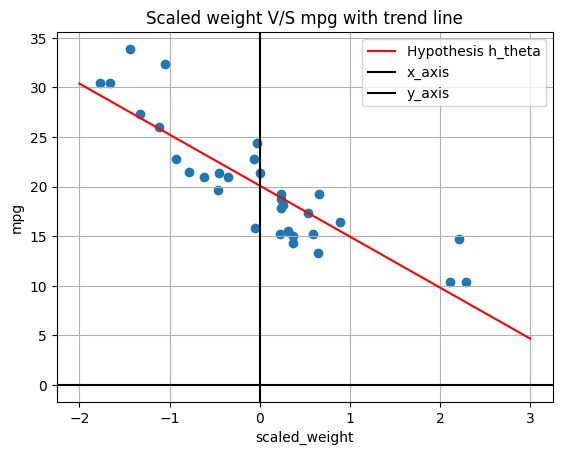

In [5]:
car.plot_trend_line(theta0, theta1, car.cars_data[car.scaled_w], car.cars_data[car.mpg], 'Scaled weight V/S mpg with trend line', car.scaled_w, car.mpg)

---
__Question 1e.__ Repeat for the following choices of the learning rate: .10, .15, .20, .25, .30.
    i. Plot cost function for each learning rate on same graph.


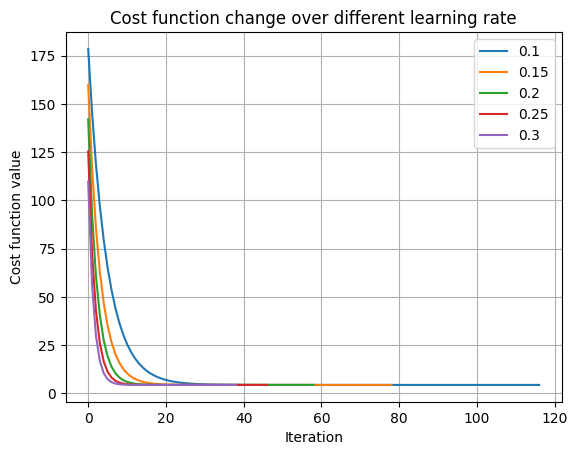

In [6]:
rate_lst = [.10, .15, .20, .25, .30]
time_lst = []
# Redo .20 to time it.
for rate in rate_lst:
    # Time the function and store in a list.
    start = timeit.default_timer()
    car.gradient_descent(rate)
    end = timeit.default_timer()

    time_lst.append(end - start)

# Plot the cost functions.
car.cost_fn_plot()

__Question 1e cont.__
    ii. Make a plot of the total run time of the gradient descent algorithm versus the
        learning rate.

---

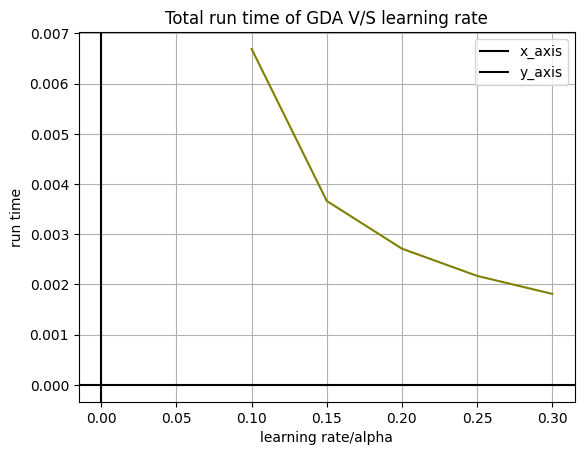

In [7]:
def plot_time():
    """
    Function to plot the time vs learning rate.
    :return: None
    """
    plot.plot(rate_lst, time_lst, 'olive')
    plot.title("Total run time of GDA V/S learning rate")
    plot.axvline(x=0, c='black', label='x_axis')
    plot.axhline(y=0, c='black', label='y_axis')
    plot.xlabel('learning rate/alpha')
    plot.ylabel('run time')
    plot.legend()
    plot.grid()
    plot.show()

# Plot the time vs learning rates.
plot_time()


---
__Question 1f.__ What can you say about the relationship between learning rate and rate of
learning/convergence
based on your solution to 1e?

---

On average the trend of the learning rate to rate of learning has an inverse relation for our
rates, i.e. increasing the alpha causes the run time to decrease.
Also based on the number of iterations, higher learning rate decreases the number of iteration in
 GDA. ($\because \alpha=.30$, stops before ~40 iterations, while $\alpha=.10$ goes up to ~120
 iterations)
